# Text Analysis with (MBTI) Myers-Briggs Personality Type Dataset

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# read data
data = pd.read_csv('data/mbti_1.csv') # dtype = {'type': str,'post': ,

## Overview of the data

In [2]:
data.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
### One post

In [4]:
data.head(1).posts.values

array([ "'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design

# Distribution of the target variable?

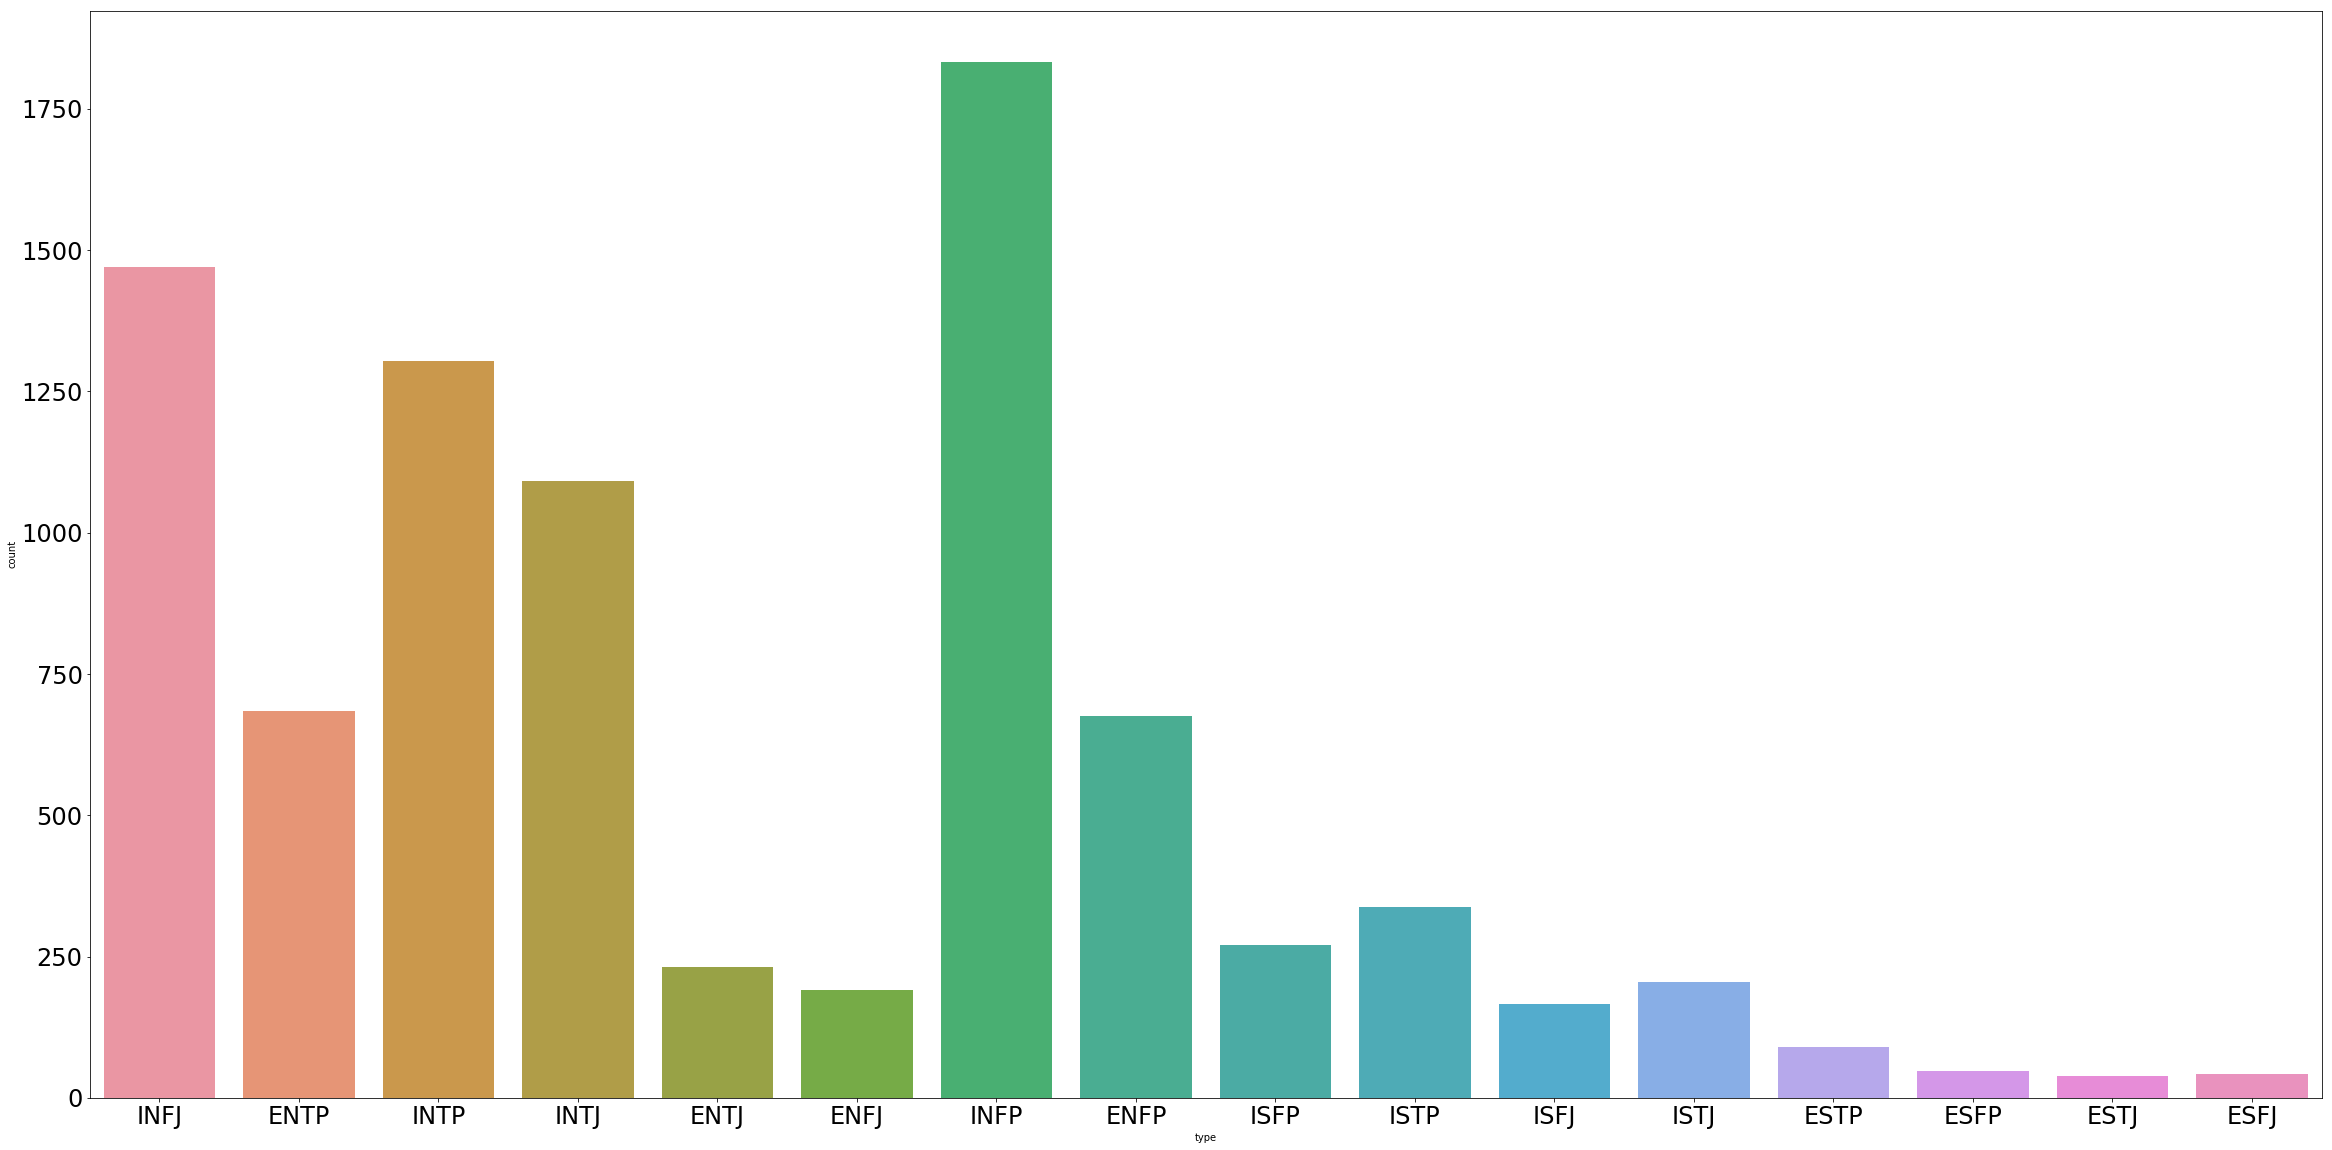

In [5]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=data, x='type')

### It is clearly unbalanced throughout the different classes. 

# Preprocessing

In [6]:
##### Encode each type to an int

from sklearn.preprocessing import LabelEncoder

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)


In [7]:
#re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', data.posts[1])
#re.findall('[A-Z][^A-Z]*', data.posts[1])
import time
##### Compute list of subject with Type | list of comments | list of url | count youtube videos


# Time
%time data.posts[1].replace('+', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ')
%time re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', data.posts[1])


from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# subject_comments_1 = [" ".join([w for w in comment.split(' ') if w not in stopwords.words("english")]) for comment in subject_comments_1]
cachedStopWords = stopwords.words("english")

# Remove urls
temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', data.posts[1])
# Keep only words
temp = re.sub("[^a-zA-Z]", " ", temp)
# Remove spaces > 1
temp = re.sub(' +', ' ', temp).lower()
# Remove stopwords and lematize
%time stemmer.stem(" ".join([w for w in temp.split(' ') if w not in cachedStopWords]))

CPU times: user 284 µs, sys: 6 µs, total: 290 µs
Wall time: 298 µs
CPU times: user 1.26 ms, sys: 33 µs, total: 1.29 ms
Wall time: 1.31 ms
CPU times: user 3.11 ms, sys: 39 µs, total: 3.14 ms
Wall time: 3.16 ms


' finding lack posts alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary enough giving new meaning game theory hello entp grin takes converse flirting acknowledge presence return words smooth wordplay cheeky grins lack balance hand eye coordination real iq test score internet iq tests funny score higher like former responses thread mention believe iq test banish know entp vanish site year half return find people still commenting posts liking ideas thoughts know entp link link think things sometimes go old sherlock holmes quote perhaps man special knowledge special powers like rather encourages seek complex cheshirewolf tumblr com post really never thought e j p real functions judge use use ne ti dominates fe emotions rarely si also use ni due strength know though ingenious saying really want try see happens playing first person shooter back drive around want see look rock paper one best makes lol guys lucky really high tumblr sy

In [8]:
##### Compute list of subject with Type | list of comments | list of url | count youtube videos
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

def pre_process_data(data, remove_stop_words=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if i % 500 == 0:
            print("%s | %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        type_labelized = lab_encoder.transform([row[1].type])[0]
        list_personality.append(type_labelized)
        list_posts.append(temp)

    #del data
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

list_posts, list_personality = pre_process_data(data, remove_stop_words=True)

500 | 8675 rows
1000 | 8675 rows
1500 | 8675 rows
2000 | 8675 rows
2500 | 8675 rows
3000 | 8675 rows
3500 | 8675 rows
4000 | 8675 rows
4500 | 8675 rows
5000 | 8675 rows
5500 | 8675 rows
6000 | 8675 rows
6500 | 8675 rows
7000 | 8675 rows
7500 | 8675 rows
8000 | 8675 rows
8500 | 8675 rows


#### Exemple of one row before process

In [12]:
data.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

#### Row text after treatment

In [13]:
list_posts[1]

' finding lack post alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary enough giving new meaning game theory hello entp grin take converse flirting acknowledge presence return word smooth wordplay cheeky grin lack balance hand eye coordination real iq test score internet iq test funny score higher like former response thread mention believe iq test banish know entp vanish site year half return find people still commenting post liking idea thought know entp link link think thing sometimes go old sherlock holmes quote perhaps man special knowledge special power like rather encourages seek complex cheshirewolf tumblr com post really never thought e j p real function judge use use ne ti dominates fe emotion rarely si also use ni due strength know though ingenious saying really want try see happens playing first person shooter back drive around want see look rock paper one best make lol guy lucky really high tumblr system hear new f

### Vectorize with count and tf-idf

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,   
                             max_df=0.5,
                             min_df=0.1) 
                                 
tfizer = TfidfTransformer()


X_cnt = cntizer.fit_transform(list_posts)
X_tfidf =  tfizer.fit_transform(X_cnt)


X_concat = np.column_stack((X_cnt.toarray(), X_tfidf.todense()))

### Plot first axes of decomposition

[ 0.03957443  0.02018837  0.01694819  0.01647801  0.01563171  0.0143733
  0.01410883  0.0125351   0.01200734  0.00990403  0.00908209  0.00890849
  0.00824419  0.00795634  0.00778169  0.00722979  0.00663513  0.00634233
  0.00567896  0.00554832  0.00534329  0.00514233  0.00488073  0.00472525]


/Users/Dupi/venv_py_3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/Users/Dupi/venv_py_3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


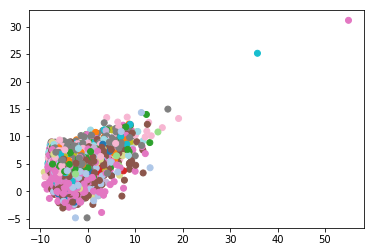

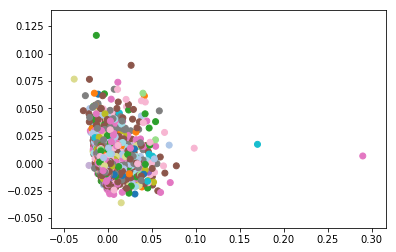

In [15]:
from sklearn.decomposition import KernelPCA, FastICA, PCA
from sklearn.preprocessing import StandardScaler

X_concat_scaled = StandardScaler().fit_transform(X_concat)

pca = PCA(n_components=24)
pca.fit(X_concat)
pca_vec = pca.transform(X_concat_scaled)
print(pca.explained_variance_ratio_)
plt.figure(1)
plt.scatter(pca_vec[:,0], pca_vec[:,1], c=list_personality, cmap=plt.get_cmap('tab20') )

ica= FastICA(n_components=24)
ica.fit(X_concat)
ica_vec = ica.transform(X_concat_scaled)
plt.figure(2)
plt.scatter(ica_vec[:,0], ica_vec[:,1], c=list_personality, cmap=plt.get_cmap('tab20') )

X_concat_pca = np.column_stack((pca_vec, ica_vec))
# Does not improve xgboost predictions


In [22]:
# Confusion plot
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Try multiple sklearn classifiers

In [23]:
##### Sklearn classifiers

from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

import xgboost as xgb
import pickle

# Vectorizer

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,   
                             max_df=0.5,
                             min_df=0.1) 

tfizer = TfidfTransformer()

# Classifiers
PassAgg = PassiveAggressiveClassifier(max_iter=50)

sgd = SGDClassifier(loss='hinge',   
              penalty='l1',   
              alpha=1e-2,     
              random_state=42,
              max_iter=7,     
              tol=None)

# SVM
lsvc = LinearSVC()

# Multinomial Naive Bayes
mlNB = MultinomialNB()

# Xgboost 
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.6
param['ntrees'] = 300
param['subsample'] = 0.93
param['max_depth'] = 2
param['silent'] = 1
param['n_jobs'] = 8
param['num_class'] = len(unique_type_list)
xgb_class = xgb.XGBClassifier(**param)

### K-fold validation training

In [24]:
# Train with k fold stratified validation

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

name = lambda x : str(x).split('(')[0]

def train_stratified(models, X, y, add_idf=False, nsplits=3, confusion=False):
    '''
    Take a sklearn model like, feature set X, target set y and number of splits to compute Stratified kfold validation.
    Args:
        X (array):       Numpy array of features.
        y (str):         Target - Personality list.
        add_idf (bool):  Wehther to use tf-idf on CountVectorizer.
        nsplits(int):    Number of splits for cross validation.
        confusion(bool): Wether to plot confusion matrix 
        
    Returns:
        dict: Dictionnary of classifiers and their cv f1-score.
    '''
    fig_i = 0
    kf = StratifiedShuffleSplit(n_splits=nsplits)
    
    # Store fold score for each classifier in a dictionnary
    dico_score = {}
    dico_score['merged'] = 0
    for model in models:
        dico_score[name(model)] = 0
    
    # Stratified Split
    for train, test in kf.split(X,y):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        
        X_train = cntizer.fit_transform(X_train)
        X_test = cntizer.transform(X_test)
        
        # tf-idf
        if add_idf == True:
            X_train_tfidf =  tfizer.fit_transform(X_train_cnt)
            X_test_tfidf =  tfizer.transform(X_test_cnt)
        
            X_train = np.column_stack((X_train_tfidf.todense(), X_train))
            X_test = np.column_stack((X_test_tfidf.todense(), X_test))
        
        probs = np.ones((len(y_test), 16))
        for model in models:
            # if xgboost use dmatrix
            if 'XGB' in name(model):
                xg_train = xgb.DMatrix(X_train, label=y_train)
                xg_test = xgb.DMatrix(X_test, label=y_test)
                watchlist = [(xg_train, 'train'), (xg_test, 'test')]
                num_round = 30
                bst = xgb.train(param, xg_train, num_round, watchlist, early_stopping_rounds=6)
                preds = bst.predict(xg_test)
                probs = np.multiply(probs, preds)
                preds = np.array([np.argmax(prob) for prob in preds])
            else:
                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                probs = np.multiply(probs, model.predict_proba(X_test))
            # f1-score
            score = f1_score(y_test, preds, average='weighted')
            dico_score[name(model)] += score
            print('%s : %s' % (str(model).split('(')[0], score))
            
            if confusion == True:
                # Compute confusion matrix
                cnf_matrix = confusion_matrix(y_test, preds)
                np.set_printoptions(precision=2)
                # Plot confusion matrix
                plt.figure(fig_i)
                fig_i += 1
                plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,
                                                          title=('Confusion matrix %s' % name(model)))
        
        # product of class probabilites of each classifier 
        merged_preds = [np.argmax(prob) for prob in probs]
        score = f1_score(y_test, merged_preds, average='weighted')
        print('Merged score: %s' % score)
        dico_score['merged'] += score
        
    return {k: v / nsplits for k, v in dico_score.items()}



MultinomialNB : 0.60149999677
Confusion matrix
[0]	train-merror:0.41181	test-merror:0.43318
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 6 rounds.
[1]	train-merror:0.378891	test-merror:0.410138
[2]	train-merror:0.370181	test-merror:0.395161
[3]	train-merror:0.359165	test-merror:0.391705
[4]	train-merror:0.344947	test-merror:0.373272
[5]	train-merror:0.340592	test-merror:0.376728
[6]	train-merror:0.331625	test-merror:0.370968
[7]	train-merror:0.320866	test-merror:0.364055
[8]	train-merror:0.31318	test-merror:0.359447
[9]	train-merror:0.308953	test-merror:0.354839
[10]	train-merror:0.30383	test-merror:0.354839
[11]	train-merror:0.298066	test-merror:0.346774
[12]	train-merror:0.292814	test-merror:0.35023
[13]	train-merror:0.289228	test-merror:0.341014
[14]	train-merror:0.286153	test-merror:0.35023
[15]	train-merror:0.280517	test-merror:0.35023
[16]	train-merror:0.272704	test-merror:0.345622
[17]	tra

/Users/Dupi/venv_py_3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Merged score: 0.624765337145
MultinomialNB : 0.5961342153
Confusion matrix
[0]	train-merror:0.410785	test-merror:0.449309
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 6 rounds.
[1]	train-merror:0.380428	test-merror:0.396313
[2]	train-merror:0.36416	test-merror:0.385945
[3]	train-merror:0.357756	test-merror:0.381336
[4]	train-merror:0.345459	test-merror:0.367512
[5]	train-merror:0.34072	test-merror:0.367512
[6]	train-merror:0.331754	test-merror:0.360599
[7]	train-merror:0.325605	test-merror:0.362903
[8]	train-merror:0.318432	test-merror:0.357143
[9]	train-merror:0.313437	test-merror:0.355991
[10]	train-merror:0.304727	test-merror:0.349078
[11]	train-merror:0.301396	test-merror:0.346774
[12]	train-merror:0.296785	test-merror:0.342166
[13]	train-merror:0.29243	test-merror:0.33871
[14]	train-merror:0.286025	test-merror:0.345622
[15]	train-merror:0.281542	test-merror:0.339862
[16]	train-merror:0.27616

/Users/Dupi/venv_py_3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Merged score: 0.643958635994
MultinomialNB : 0.603552075404
Confusion matrix
[0]	train-merror:0.410657	test-merror:0.40553
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 6 rounds.
[1]	train-merror:0.385167	test-merror:0.382488
[2]	train-merror:0.36954	test-merror:0.37788
[3]	train-merror:0.35545	test-merror:0.365207
[4]	train-merror:0.349174	test-merror:0.359447
[5]	train-merror:0.340592	test-merror:0.355991
[6]	train-merror:0.335468	test-merror:0.347926
[7]	train-merror:0.325733	test-merror:0.35023
[8]	train-merror:0.319457	test-merror:0.347926
[9]	train-merror:0.313693	test-merror:0.343318
[10]	train-merror:0.305879	test-merror:0.337558
[11]	train-merror:0.303446	test-merror:0.343318
[12]	train-merror:0.298834	test-merror:0.342166
[13]	train-merror:0.292558	test-merror:0.33871
[14]	train-merror:0.288075	test-merror:0.335253
[15]	train-merror:0.282055	test-merror:0.322581
[16]	train-merror:0.2777	

/Users/Dupi/venv_py_3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Merged score: 0.621507437721
MultinomialNB : 0.614259972109
Confusion matrix
[0]	train-merror:0.406174	test-merror:0.426267
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 6 rounds.
[1]	train-merror:0.385808	test-merror:0.414747
[2]	train-merror:0.365441	test-merror:0.395161
[3]	train-merror:0.354938	test-merror:0.387097
[4]	train-merror:0.346612	test-merror:0.375576
[5]	train-merror:0.340464	test-merror:0.368664
[6]	train-merror:0.332522	test-merror:0.360599
[7]	train-merror:0.326246	test-merror:0.361751
[8]	train-merror:0.318945	test-merror:0.357143
[9]	train-merror:0.312156	test-merror:0.349078
[10]	train-merror:0.306007	test-merror:0.352535
[11]	train-merror:0.300243	test-merror:0.34447
[12]	train-merror:0.297041	test-merror:0.357143
[13]	train-merror:0.291533	test-merror:0.358295
[14]	train-merror:0.286025	test-merror:0.361751
[15]	train-merror:0.282695	test-merror:0.359447
[16]	train-merror:0.

/Users/Dupi/venv_py_3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Merged score: 0.641797621322


{'MultinomialNB': 0.59935843440856473,
 'XGBClassifier': 0.64594263592699741,
 'merged': 0.63566106566266012}

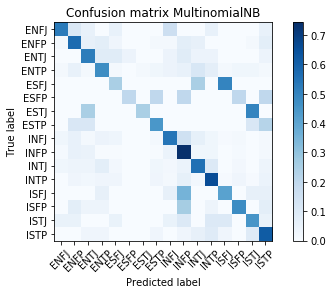

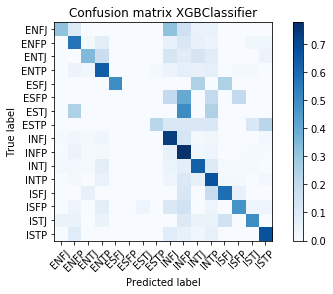

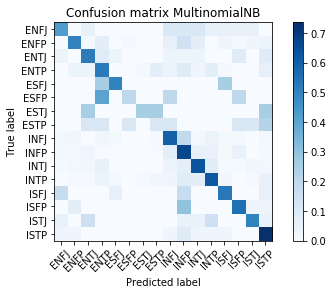

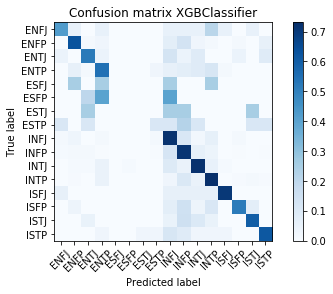

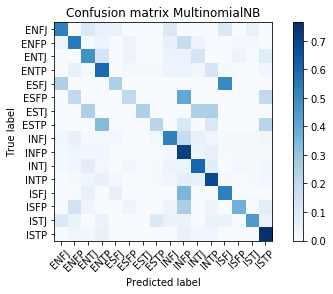

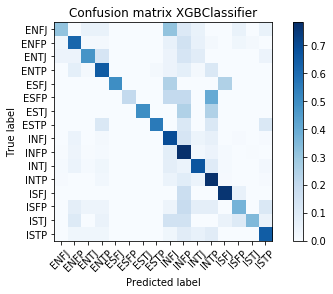

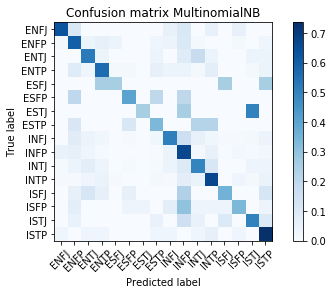

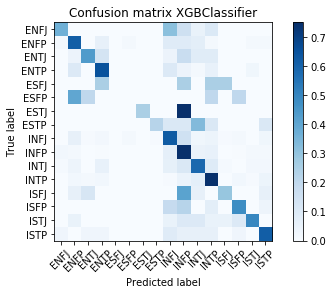

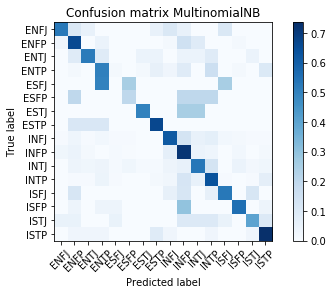

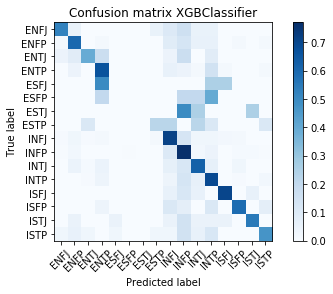

In [25]:
# Compare multinomial naive bayes, xgb and their product predictions
train_stratified([mlNB, xgb_class], list_posts, list_personality, add_idf=False, nsplits=5, confusion=True)

In [30]:
# Save model for later use

X = list_posts
y = list_personality

from sklearn.model_selection import train_test_split
import pickle

train_X, test_X, train_Y, test_Y = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

train_X = cntizer.fit_transform(train_X)
test_X = cntizer.transform(test_X)

xg_train = xgb.DMatrix(train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 30

bst = xgb.train(param, xg_train, 
                num_round, watchlist, 
                early_stopping_rounds=6)

preds = bst.predict(xg_test)
preds = np.array([np.argmax(prob) for prob in preds])

print(classification_report(test_Y, preds))
        
# save model and vectorizer
pickle.dump(cntizer, open("data/CountVectorizer.pickle.dat", "wb"))
pickle.dump(bst, open("data/model.pickle.dat", "wb"))

[0]	train-merror:0.424992	test-merror:0.41586
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 6 rounds.
[1]	train-merror:0.387335	test-merror:0.386814
[2]	train-merror:0.374116	test-merror:0.38958
[3]	train-merror:0.358438	test-merror:0.373444
[4]	train-merror:0.349524	test-merror:0.367911
[5]	train-merror:0.340762	test-merror:0.357308
[6]	train-merror:0.334614	test-merror:0.352697
[7]	train-merror:0.324316	test-merror:0.352236
[8]	train-merror:0.31786	test-merror:0.350853
[9]	train-merror:0.310483	test-merror:0.346243
[10]	train-merror:0.305564	test-merror:0.34532
[11]	train-merror:0.296957	test-merror:0.348548
[12]	train-merror:0.293729	test-merror:0.342554
[13]	train-merror:0.28881	test-merror:0.341632
[14]	train-merror:0.283277	test-merror:0.34532
[15]	train-merror:0.277897	test-merror:0.346704
[16]	train-merror:0.271749	test-merror:0.341632
[17]	train-merror:0.26806	test-merror:0.339327
[18]	tr

### Try multioutput classification

In [37]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    '''
    transform mbti to binary vector
    '''
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    '''
    transform binary vector to mbti personality
    '''
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)


Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ..., 
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


In [32]:
# Feed classifier to MultiOutputCLassifier

clf = AdaBoostClassifier()
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_classifier.fit(X_concat, list_personality_bin)
preds = multi_target_classifier.predict(X_concat)

preds_t = [translate_back(p) for p in preds]
vec1 = data.type ==  preds_t
for i in range(4):
    print(f1_score(np.array(list_personality_bin)[:,i], preds[:,i]))


0.638921453693
0.569646569647
0.817907444668
0.846238130022


In [38]:
# Stratified cross val for multi-output
X = list_posts
y = np.array(list_personality_bin)

clf = AdaBoostClassifier()

kf = StratifiedShuffleSplit(n_splits=4)

list_score = []
list_score_per_class= []

for train, test in kf.split(X, y):
    X_train, X_test, y_train, y_test = \
        X[train], X[test], y[train], y[test]

    X_train = cntizer.fit_transform(X_train)
    X_test = cntizer.transform(X_test)

    multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
    multi_target_classifier.fit(X_train, y_train)
    preds = multi_target_classifier.predict(X_test)
    
    rev_preds = np.array([translate_back(p) for p in preds]) 
    rev_test = np.array([translate_back(p) for p in y_test])
    score = f1_score(rev_test,rev_preds, average='weighted')
    list_score.append(score)
    print('\nTotal score: %s' % f1_score(rev_test,rev_preds, average='weighted'))

    list_temp =[]
    for i in range(4):
        score_per_class = f1_score(y_test[:,i], preds[:,i])
        list_temp.append(score_per_class)
        print(score_per_class)
    list_score_per_class.append(list_temp)


/Users/Dupi/venv_py_3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Total score: 0.49895270474
0.582352941176
0.406593406593
0.803461063041
0.830291970803

Total score: 0.507834262921
0.611764705882
0.478260869565
0.784019975031
0.816363636364

Total score: 0.484912401384
0.565597667638
0.472527472527
0.794007490637
0.808703535811

Total score: 0.519829613334
0.58064516129
0.48167539267
0.805590851334
0.824372759857


In [ ]:
list_score_per_class = np.array(list_score_per_class)
print('Mean score per classes: %s' % list_score_per_class.mean(axis=0))

## Neural Nets 

### 1D convolutional with glove embedding

In [ ]:
from __future__ import print_function

import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model


BASE_DIR = ''
GLOVE_DIR = "data/glove.6B"
TEXT_DATA_DIR = "data/20_newsgroup"
MAX_SEQUENCE_LENGTH = 500
MAX_NB_WORDS = 15000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2

In [ ]:
# build index mapping words in the embeddings set to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


In [ ]:
# prepare text samples and their labels
print('Processing text dataset')

texts = list_posts  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = np.array(list_personality_bin)
# list of label ids


print('Found %s texts.' % len(texts))


In [ ]:
# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


In [ ]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]


In [ ]:
print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

### Define network

In [ ]:
print('Training convolutional network.')

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Dropout(0.25)
x = Conv1D(64, 3, activation='relu')(embedded_sequences)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(15)(x)  # global max pooling
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
preds = Dense(4, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


In [ ]:
# Summer is coming!
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=100, batch_size=64)

### Bidirectional LSTM

In [ ]:
# Bidirectional LSTM

import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

VALIDATION_SPLIT = 0.2
MAX_NB_WORDS = 20000

# fix random seed for reproducibility
numpy.random.seed(7)

# Tokenize
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(list_posts)
sequences = tokenizer.texts_to_sequences(list_posts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

In [ ]:
# split the data into a training set and a validation set

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_test = train_test_split(sequences, list_personality_bin, test_size=0.3, random_state=0, stratify=list_personality)

# truncate and pad input sequences
max_sentence_length = 600
X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_val, maxlen=max_review_length)

max_features = 20000
batch_size = 32

print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)


model = Sequential()
model.add(Embedding(max_features, 256, input_length=max_review_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])